In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

# Завантаження усіх даних

Завантажемо усі дані для того, щоб зробити певні висновки про структуру отриманого датасета

In [2]:
demo_path = 'Demo/'

In [3]:
list_file_paths = os.listdir(demo_path)

In [4]:
data = np.vstack((np.loadtxt(demo_path + file_path, delimiter=',', dtype=np.object) for file_path in list_file_paths))

In [5]:
df = pd.DataFrame(data)

Порахуємо кулькість унікальних значень в кожному стовбці і спробуємо зрозуміти які типи мають наші ознаки 

In [6]:
print('Розмірність набору даних - {}'.format(df.shape))
for i in df:
    print('{} стовбець має {} унікальних значень'.format(i, np.unique(df[i]).shape[0]))

Розмірність набору даних - (59440, 3)
0 стовбець має 13067 унікальних значень
1 стовбець має 18146 унікальних значень
2 стовбець має 19 унікальних значень


Перші дві ознаки можуть бути числовими третя скоріш всього категоріальна. Перевіримо це припущення шляхом зміни типу серії на числовий.

In [7]:
try:
    for i in df:
        df[i] = df[i].astype(np.float32)
except ValueError:
    print("У {} стовбці тип змінено не було".format(i+1)) # І ну наступних

У 3 стовбці тип змінено не було


In [8]:
df.dtypes

0    float32
1    float32
2     object
dtype: object

In [9]:
df[[0, 1]].agg([np.min, np.max, np.std])

,0,1
amin,-2268850.0,-1738313.000
amax,9655840.0,7774284.000
std,2607186.5,1694594.125


Окільки перші дві ознаки без проблем перевелись в числовий тип і мають занадто багато значень, якщо рахувати відносно кількості усіх даних то вони числові

Окільки третій стовбчик має не настільки багато можливих значень подивимось на нього детальніше

In [10]:
df[2].value_counts()

1           33055
17           8395
9            7472
25           3742
5            3583
13           2357
24-52         289
24-58         217
24-53         145
24-5           85
24-57          40
24-59          22
19             17
24-51           8
2               5
24-15           3
23              2
24--4111        2
24-4            1
Name: 2, dtype: int64

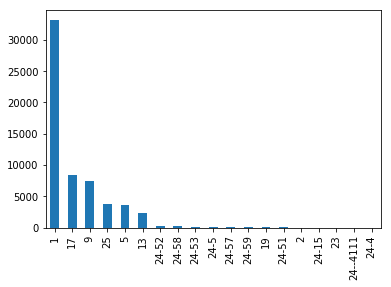

In [11]:
df[2].value_counts().plot('bar');

Схоже на те, що третій стовбець містьть категоріальні ознаки. Скористаємось методом прямого кодування(даммі-змінні) для того щоб перетворити категоріальні дані в числові.

In [12]:
df.keys()

RangeIndex(start=0, stop=3, step=1)

In [13]:
df = df.rename(columns={0: 'first_numeric', 
                        1: 'second_numeric', 
                        2: 'categorical'})

In [14]:
df = pd.get_dummies(df)

In [15]:
df.head()

,first_numeric,second_numeric,categorical_1,categorical_13,categorical_17,categorical_19,categorical_2,categorical_23,categorical_24--4111,categorical_24-15,...,categorical_24-5,categorical_24-51,categorical_24-52,categorical_24-53,categorical_24-57,categorical_24-58,categorical_24-59,categorical_25,categorical_5,categorical_9
0,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,160337.0,2932113.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1597025.0,3125788.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,160337.0,873125.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.to_csv('demo.csv', index=False)